In [10]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('default')
import plotly.express as px
churn_data = pd.read_csv(r'C:\Users\User\Desktop\p2\git\my_works\data\база\churn.csv')
churn_data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#9.1 Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.
#9.2 Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

C:\Temp\ipykernel_8564\2395975994.py:7: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


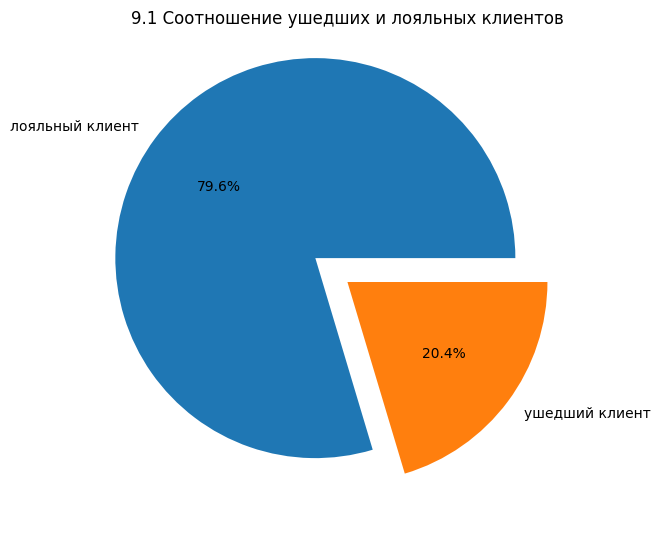

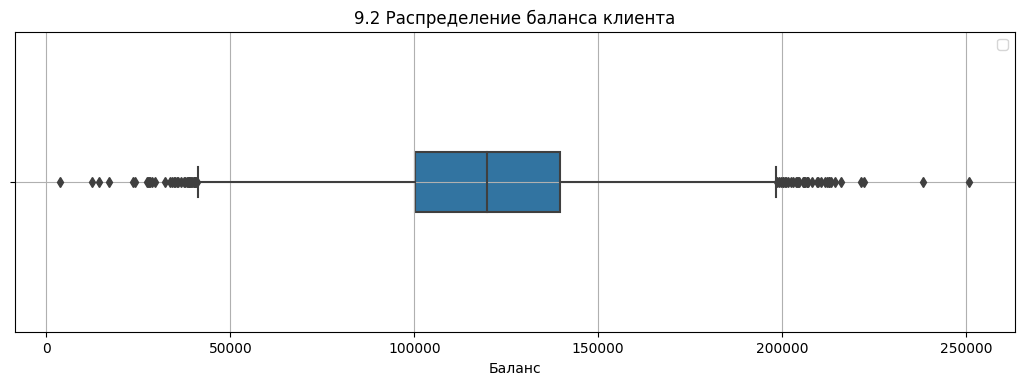

In [11]:
churn_data = churn_data.drop(['RowNumber'], axis=1)
Exited_churn_data = churn_data['Exited'].value_counts()
fig= plt.figure(figsize=(5,5))
axes= fig.add_axes([0,0,1,1])
axes.pie(Exited_churn_data, labels=['лояльный клиент', 'ушедший клиент'], autopct='%.1f%%', explode=[0.2,0]); 
axes.set_title('9.1 Соотношение ушедших и лояльных клиентов')
fig.show()
#Из шаровой диаграммы видно соотношение в процентах: 1 — ушедших клиентов, 0 — лояльных клиент. Преобладающую долю состаляют лояльные клиенты, которые в 4 раза больше.

fig = plt.figure(figsize = (10,3))
boxplot = fig.add_axes([0, 0, 1, 1])
boxplot = sns.boxplot(data=churn_data[churn_data['Balance']>2500], x='Balance', orient='h', width=0.2)
boxplot.set_title('9.2 Распределение баланса клиента')
boxplot.set_xlabel('Баланс')
boxplot.xaxis.set_tick_params()
boxplot.grid()
boxplot.legend();
#

#9.3 Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

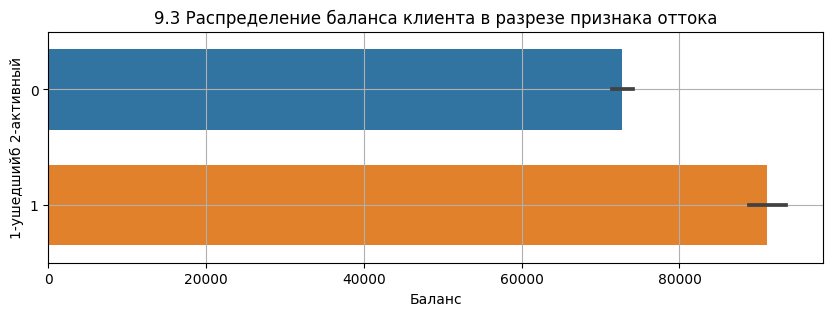

In [12]:

fig= plt.figure(figsize = (10,3))
barplot=sns.barplot(data= churn_data, y='Exited', x = 'Balance', orient='h', width=0.7)
barplot.set_title('9.3 Распределение баланса клиента в разрезе признака оттока')
barplot.set_xlabel('Баланс')
barplot.set_ylabel('1-ушедшийб 2-активный')
barplot.grid()
#

#9.4 Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

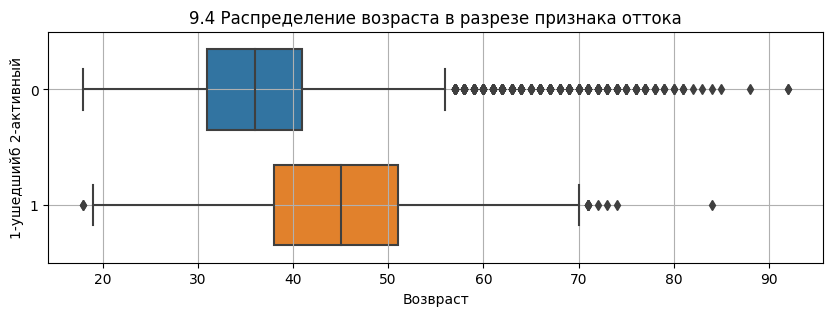

In [13]:
fig= plt.figure(figsize = (10,3))
#boxplot=sns.barplot(data= churn_data, y='Exited', x = 'Age', orient='h', width=0.7)
#box.set_title('9.4 Распределение возраста в разрезе признака оттока')
#boxplot.set_xlabel('Возвраст')
#boxplot.set_ylabel('1-ушедшийб 2-активный')
#boxplot.grid()
boxplot=sns.boxplot(data= churn_data, y='Exited', x = 'Age', orient='h', width=0.7)
boxplot.set_title('9.4 Распределение возраста в разрезе признака оттока')
boxplot.set_xlabel('Возвраст')
boxplot.set_ylabel('1-ушедшийб 2-активный')
boxplot.grid()
#

#9.5 Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты.

In [14]:
ch_Est = churn_data.groupby(['CreditScore', 'Exited'], as_index=False)['EstimatedSalary'].mean()
fig = px.scatter(data_frame=ch_Est, x = 'CreditScore', y = 'EstimatedSalary', color='Exited', width=1200, height=600, title='9.5 Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты')
fig.show()
#

#9.6 Кто чаще уходит, мужчины или женщины?

C:\Temp\ipykernel_8564\1010486401.py:8: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



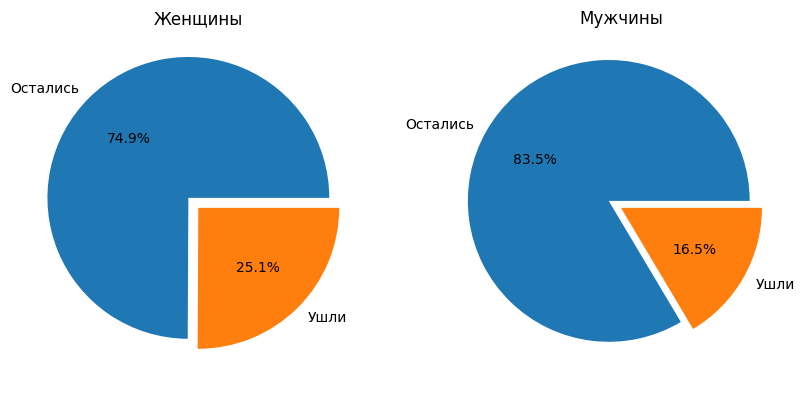

In [15]:
df_ex= churn_data[['Gender', 'Exited']].groupby('Gender')['Exited'].value_counts(normalize=True).unstack()
df_ex=df_ex.T
fig,axes= plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].pie(df_ex['Female'], labels = ['Остались', 'Ушли'], autopct='%.1f%%', explode = [0.1,0]);
axes[0].set_title('Женщины')
axes[1].pie(df_ex['Male'], labels= ['Остались', 'Ушли'],autopct='%.1f%%', explode = [0.1,0]);
axes[1].set_title('Мужчины')
fig.show()
#


#9.7 Как отток клиентов зависит от числа приобретённых у банка услуг?

In [16]:
fig = px.bar(data_frame=churn_data[churn_data['Exited']==1]['NumOfProducts'].value_counts(), x = 'NumOfProducts',title='9.7 Отток клиентов зависит от числа приобретённых у банка услуг')
fig.update_layout(xaxis_title='количество услуг банка', yaxis_title = 'ушедший клиент')
fig.show()


#9.8. Как влияет наличие статуса активного клиента на отток клиентов? 

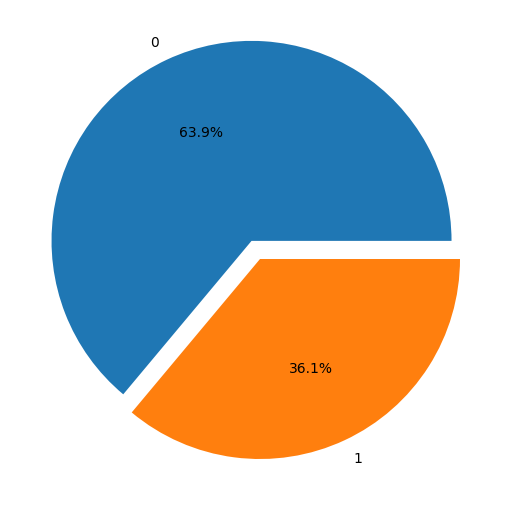

In [17]:
IsActiveMember= churn_data.groupby('IsActiveMember')['Exited'].sum()*100
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(IsActiveMember, labels=IsActiveMember.index, autopct='%.1f%%', explode=[0.1,0]);










#9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [60]:
#import plotly.express as px
new_data = churn_data.groupby('Geography', as_index=False)['Exited'].mean()
fig= px.choropleth(data_frame=new_data,locations = 'Geography', locationmode = 'country names', range_color = [0, 0.4], color = 'Exited',title='Доля ушедших клиентов по странам', scope = 'europe', width=800, height=500)
fig.show()


#9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.